# <b><center>Feature Selection Techniques on Mobile dataset</center></b>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

In [20]:
# Url to mobile dataset
url_data = "https://raw.githubusercontent.com/mohd-faizy/feature-engineering-hacks/main/_dataset/mobile_dataset.csv"

In [21]:
mobile_df = pd.read_csv(url_data)
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Mobile dataset**

- `battery_power`: This feature likely represents the battery capacity or power of a mobile device.
- `blue`: This feature could represent whether a mobile device has Bluetooth capability (1 for yes, 0 for no).
- `clock_speed`: This feature may indicate the clock speed or processing speed of the device's CPU.
- `dual_sim`: This feature could represent whether a mobile device supports dual SIM cards (1 for yes, 0 for no).
- `fc`: This feature might refer to the front camera's resolution or megapixels.
- `four_g`: This feature could represent whether a mobile device supports 4G connectivity (1 for yes, 0 for no).
- `int_memory`: This feature may represent the internal memory or storage capacity of the device.
- `m_dep`: This feature might indicate the thickness or depth of the mobile device.
- `mobile_wt`: This feature could represent the weight of the mobile device.
- `n_cores`: This feature may indicate the number of CPU cores or processors in the device.
- `pc`: This feature could represent the primary camera's resolution or megapixels.
- `px_height`: This feature might refer to the height (in pixels) of the device's display.
- `px_width`: This feature could represent the width (in pixels) of the device's display.
- `ra`: This feature represents the amount of RAM (Random Access Memory) in the device.
- `sc_h`: This feature may indicate the height (in cm) of the device's screen.
- `sc_w`: This feature could represent the width (in cm) of the device's screen.
- `talk_time`: This feature represents the talk time (in minutes) provided by the device's battery.
- `three_g`: This feature could represent whether a mobile device supports 3G connectivity (1 for yes, 0 for no).
- `touch_screen`: This feature may indicate whether the device has a touch screen (1 for yes, 0 for no).
- `wif`: This feature represents whether the device supports Wi-Fi connectivity (1 for yes, 0 for no).
- `price_range`: This feature likely indicates the price range or category to which the mobile device belongs.


In [22]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## **Univariate Selection**

- **Univariate selection**, also known as univariate feature selection, is a technique used in machine learning and statistics to **select the most relevant features from a dataset**.

- It focuses on examining each feature independently to determine its individual relationship with the target variable.

- In univariate selection, features are evaluated one at a time based on a specific statistical metric or scoring function, such as the `chi-square test`, `correlation coefficient`, or `mutual information`.

- The metric measures the strength of the relationship between each feature and the target variable. Features with the highest scores are considered the most informative and are selected for further analysis or modeling, while less relevant features are discarded.

- Univariate selection has the advantage of simplicity and computational efficiency since it considers only one feature at a time. However, it may overlook the interactions or dependencies between features, which can be important for predictive accuracy. Therefore, it is often used as an initial step in feature selection, followed by more **advanced techniques** that consider multiple features simultaneously, such as `recursive feature elimination`(`rfe`) or regularization methods.

In [23]:
X = mobile_df.iloc[:, :-1]
y = mobile_df['price_range']

In [24]:
print(mobile_df.shape)
print(X.shape)
print(y.shape)

(2000, 21)
(2000, 20)
(2000,)


In [25]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Apply SelectKBest Algorithm
selector = SelectKBest(score_func=chi2, k=20)
ordered_feature = selector.fit(X, y)

scores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
columns = pd.DataFrame(X.columns, columns=["Features"])

# Concatenate feature names and scores
features_rank = pd.concat([columns, scores], axis=1)

# Sort features by score in descending order
features_rank.sort_values(by="Score", ascending=False, inplace=True)
display(features_rank)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [26]:
features_rank.nlargest(10, "Score")

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [47]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Perform univariate selection
k = 20  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

sel_feat_df = {'Features': mobile_df.columns[selected_indices],
               'Score': selector.scores_[selected_indices]}

# Create a DataFrame to store the selected features and their scores
selected_features = pd.DataFrame(sel_feat_df)

# Sort the DataFrame by score in descending order
selected_features.sort_values(by='Score', ascending=False, inplace=True)

# Reset the index of the DataFrame
selected_features.reset_index(drop=True, inplace=True)

# Print the selected feature indices and their corresponding scores
display(selected_features)

,Features,Score
0,ram,931267.519053
1,px_height,17363.569536
2,battery_power,14129.866576
3,px_width,9810.586750
4,mobile_wt,95.972863
5,int_memory,89.839124
6,sc_w,16.480319
7,talk_time,13.236400
8,fc,10.135166
9,sc_h,9.614878


- The `get_support` method is used to obtain the `indices` of the selected features during the feature selection process. It helps identify which features have been chosen for further analysis or modeling.

- If we use `selector.get_support(indices=False)`, the `get_support` method will return a boolean mask instead of the indices of the selected features.

- In this case, the boolean mask will have the same length as the total number of features in your dataset. Each element in the mask will indicate whether the corresponding feature was selected (`True`) or not selected (`False`) during the feature selection process.

- `inplace=True` is set, it means that the sorting operation will be performed directly on the `selected_features` DataFrame itself, modifying it in place.


- if `inplace` is set to `False`, which means that the sorting operation would return a new DataFrame with the sorted values, leaving the original DataFrame unchanged.

**Ploting the Felected Features**

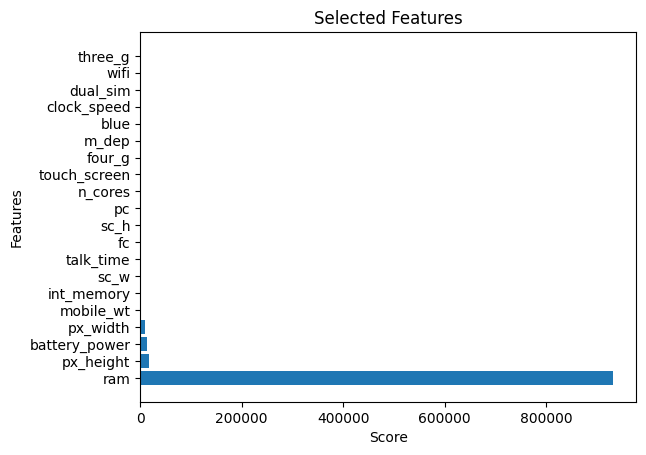

In [28]:
# Plotting the horizontal bar plot
plt.barh(selected_features['Features'], selected_features['Score'])
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Selected Features')
plt.show()

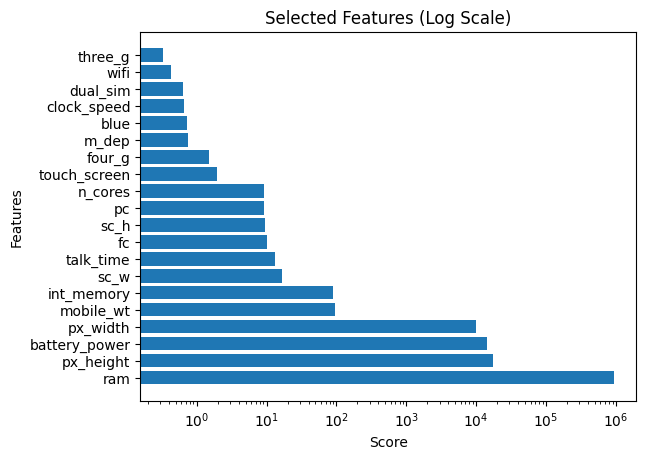

In [29]:
# Plotting the horizontal bar plot with logarithmic scale
plt.barh(selected_features['Features'], selected_features['Score'])
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Selected Features (Log Scale)')
plt.show()

## **Feature Importance**

`feature_importances_` is an attribute of the `ExtraTreesClassifier` class in scikit-learn (sklearn). It represents the importance of each feature in the input dataset according to the Extra Trees algorithm.

The feature importances are calculated based on the algorithm's internal calculations during the training process. The values assigned to each feature indicate the relative importance of that feature for predicting the target variable.

The `feature_importances_` attribute is an array-like object that holds a numerical value for each feature in the dataset. The higher the value, the more important the feature is considered by the Extra Trees algorithm in making predictions.

You can access the `feature_importances_` attribute after fitting an instance of the `ExtraTreesClassifier` on the data. It allows you to examine and analyze the relative importance of different features in your dataset, which can be useful for feature selection, understanding the underlying patterns, and gaining insights into the predictive power of each feature.

**ExtraTreesClassifier on Mobile dataset**

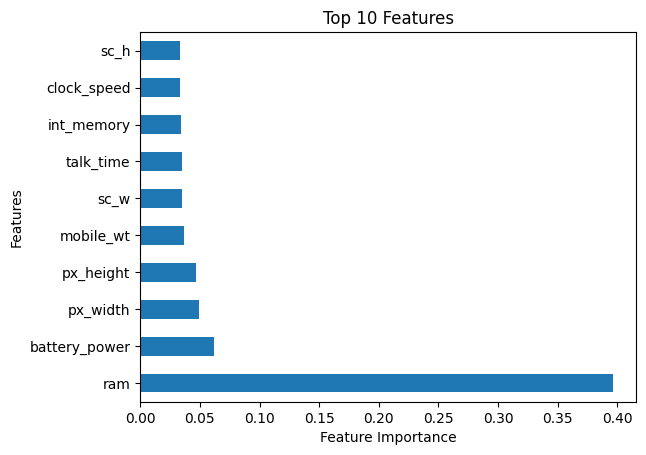

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = mobile_df.iloc[:, :-1]
y = mobile_df['price_range']

# Create an instance of the ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Visualize feature importances
ranked_features = pd.Series(feature_importances, index=X.columns)
top_10_features = ranked_features.nlargest(10)

# Plotting the features
top_10_features.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features')
plt.show()

### **ExtraTreesClassifier on titanic dataset**

[0.17259482 0.09967186 0.16394871 0.04258339 0.03969429 0.16644463
 0.1319516  0.15493789 0.01251739 0.00622663 0.0094288 ]


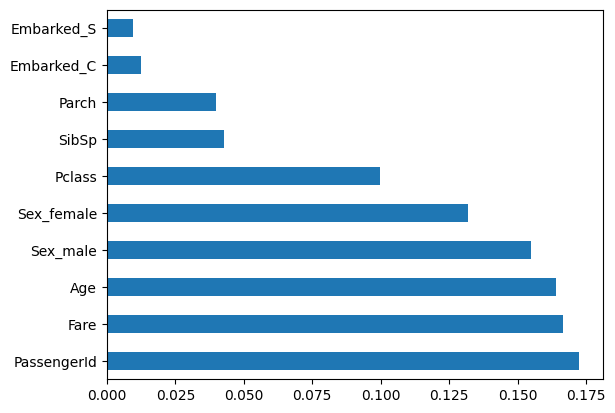

In [31]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


url_titanic = "https://raw.githubusercontent.com/mohd-faizy/feature-engineering-hacks/main/_dataset/titanic.csv"

# Load the Titanic dataset
titanic_data = pd.read_csv(url_titanic)

# Preprocess the data
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Remove irrelevant columns

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables using one-hot encoding
categorical_cols = ['Sex', 'Embarked']
titanic_data = pd.get_dummies(titanic_data, columns=categorical_cols)

# Split the data into features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the ExtraTreesClassifier
clf = ExtraTreesClassifier()

# Train the model
clf.fit(X_train, y_train)


print(clf.feature_importances_)

ranked_features = pd.Series(clf.feature_importances_, index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

## **Correlation**

In [32]:
mobile_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


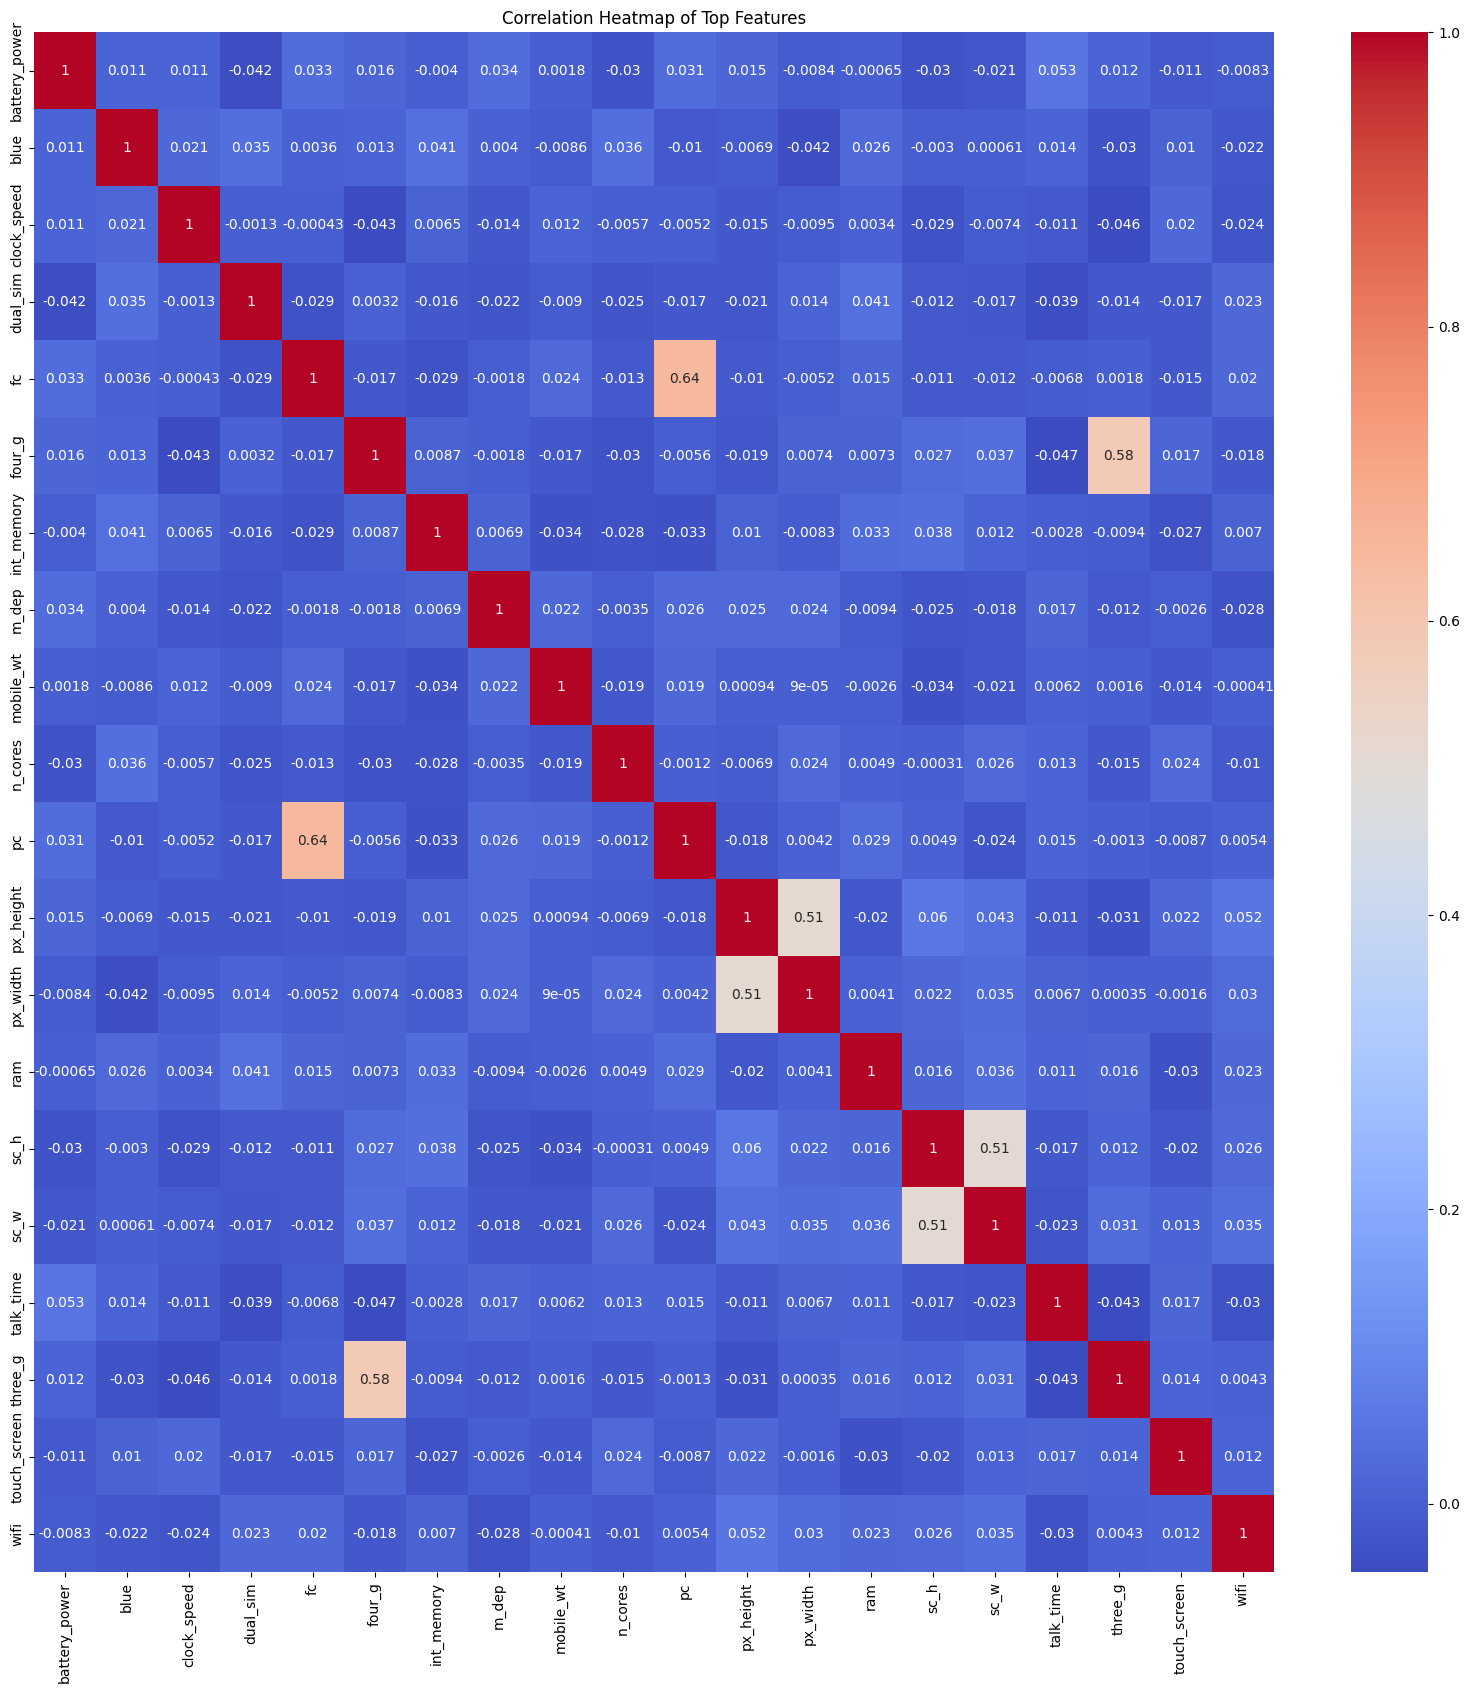

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = mobile_df.iloc[:, :-1].corr()
top_features = corr.index

plt.figure(figsize=(20, 20))
sns.heatmap(mobile_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()

## **Remove The correlated**

In [34]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in the absolute coefficient value
                colname = corr_matrix.columns[i]        # Getting the name of the column
                col_corr.add(colname)

    return col_corr

# setting the threshold value
threshold = 0.5

In [35]:
correlation(mobile_df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

## **Information Gain**

- Information gain measures the amount of information a feature provides about the target variable.

- The `mutual_info_classif` function calculates the mutual information or information gain between features and the target variable.

- Higher mutual information values indicate stronger relationships between features and the target variable.

- Features with higher mutual information are considered more important for predicting the target variable.

- The mutual_info_classif function helps in assessing feature relevance and can be used for tasks like feature selection or dimensionality reduction.

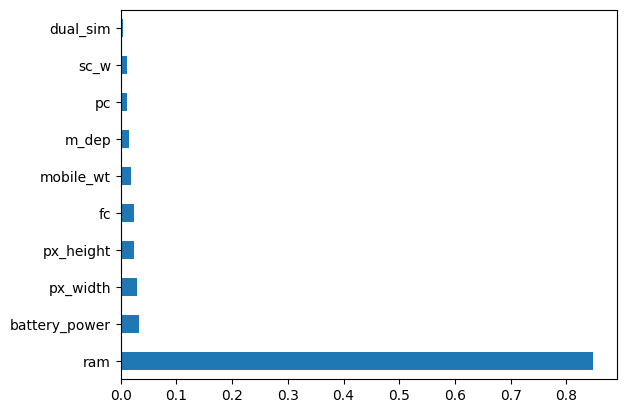

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Assuming 'mobile_df' is the DataFrame containing your data

X = mobile_df.iloc[:, :-1]
y = mobile_df['price_range']

mutual_info = mutual_info_classif(X, y)

mutual_data = pd.Series(mutual_info, index=X.columns)
sorted_data = mutual_data.sort_values(ascending=False)
top_10_data = sorted_data.nlargest(10)

# plotting the top 10 features
top_10_data.plot(kind='barh')
plt.show()